<a href="https://colab.research.google.com/github/dydyandra/kecerdasan-komputasional/blob/master/California_Hierarchical_Clustering_05111940000119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas California Housing Hierarchical Clustering
Nama: Dyandra Paramitha Widyadhana<br>
NRP: 05111940000119<br>
Kelas: KK F

# Tahap 1: Membaca Dataset, Feature Selection, Data Preprocessing. 
Link Dataset: [California House Prices](https://www.kaggle.com/camnugent/california-housing-prices)

Langkah-langkah awal dari melakukan clustering sama dengan pada penugasan KMeans Clustering sebelumnya yaitu dengan: 
1.	Membaca dataset
2.	Data Preprocessing
3.	Feature Selection

Adapun penjelasan langkah-langkah ini sama dengan [KMeans Clustering](https://colab.research.google.com/drive/1tm4y6mVOSF90r-yG6c2dWnlaBfCON4Uu?authuser=5#scrollTo=tFdcRU2ymwcw)

## Membaca Dataset

1.	Sebelum melakukan clustering, yang pertama harus dilakukan yaitu melakukan import library yang dibutuhkan. Ada beberapa library yang dibutuhkan seperti pandas, numpy, matplotlib, seaborn, KMeans dan datasets (yang berasal dari Machine Learning Library scikit-learn). 

In [ ]:
# importing libraries used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import vq
from sklearn.neighbors import NearestCentroid

2.	Setelah library berhasil diimport, kemudian kita harus membaca file housing.csv untuk mendapatkan dataset yang kita butuhkan untuk clustering. Dalam membaca file, dapat digunakan library pandas yaitu read_csv. 
Setelah file berhasil dibaca, kita dapat melihat isi dan summary dari dataset menggunakan df.head() untuk menampilkan 5 data pertama.


In [ ]:
# reading the data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Dapat dilihat beberapa isi dari dataset, yang terdiri atas longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity. 

Dapat dilihat juga bahwa semua kolom memiliki tipe data numerical, kecuali ocean_proximity yang merupakan categorical data. 


## Data Preprocessing

3.	Untuk melihat summary, kita dapat menggunakan df.info(), yang akan menampilkan beberapa hal seperti tipe, rentang index, isi kolom dataset dengan jumlah dan jenis masing-masing fitur. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


4.	Dengan menggunakan df.isnull().sum() yang akan mengembalikan jumlah data yang hilang dari dataset. Tujuan kita adalah untuk melihat apakah atribut yang dibutuhkan memiliki data yang lengkap atau tidak. Data yang hilang dapat berdampak besar pada model yang dibuat dikarenakan dapat mengurasi keakurasian dari data. 


In [ ]:
# finding missing data
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dapat dilihat bahwa terdapat 20640 data dalam dataset. Terlihat juga bahwa terdapat missing value pada total_bedrooms sebanyak 207 data. Akan tetapi, dikarenakan fitur yang digunakan yaitu longitude dan latitude, maka missing value pada total_bedrooms tidak akan mempengaruhi banyak terhadap clustering yang akan dilakukan. 

## Feature Selection

5.	Setelah melakukan data preprocessing, kemudian kita bisa memilih feature selection untuk digunakan dalam model Clustering kita. Feature selection digunakan untuk mengambil data-data yang dibutuhkan dan bertujuan untuk memilih feature yang berpengaruh dan mengesampingkan feature yang tidak berpengaruh dalam suatu kegiatan pemodelan atau penganalisaan data. 

<br>Dikarenakan yang diminta yaitu longitude dan latitude, kita dapat mengambil 2 kolom pertama dari dataframe. Untuk ini, kita bisa menggunakan df.iloc[:, [0,1]] , untuk mendapat baris (atau kolom) pada posisi tertentu dalam indeks.  Adapun kita membuat DataFrame baru yang bernama feature_df.







In [ ]:
#feature selection (longitude, latitude)
feature_df = df.iloc[:, [0,1]] 

In [ ]:
feature_df

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


6.	Dari data sebelum dilakukan pemodelan, dilihat terlebih dahulu apakah terdapat data yang harus dinormalisasi atau tidak. Normalisasi data adalah proses membuat beberapa variabel memiliki rentang nilai yang sama apabila rentang pada data asli terlalu jauh, untuk memudahkan analisis statistic dan pemodelan data nantinya. 



In [ ]:
feature_df.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


Akan tetapi, dapat dilihat bahwa rentang nilai dari longitude [-119.6, -114.3] dan latitude [35,6, 42] tidak terlalu besar. Dapat juga dilihat dari standar deviasinya yang tidak terlalu besar, sehingga data tidak perlu dinormalisasi kembali. 

7.	Setelah itu, DataFrame feature_df agar dapat dilakukan pemodelan harus diubah menjadi array. Untuk melakukan ini, dapat menggunakan library numpy, yaitu np.array, yang akan mengkonversikan yang sebelumnya bertipe DataFrame menjadi array 2D. 

In [ ]:
x  = np.array(feature_df)
x

array([[-122.23,   37.88],
       [-122.22,   37.86],
       [-122.24,   37.85],
       ...,
       [-121.22,   39.43],
       [-121.32,   39.43],
       [-121.24,   39.37]])

# Tahap 2: Hiearchical Clustering
Hierarchical Clustering atau Klasterisasi Hirarki adalah teknik clustering membentuk hirarki berdasarkan tingkatan tertentu sehingga menyerupai pohon. Metode hierarki ini biasa digunakan untuk data yang berjumlah sedikit dan jumlah cluster yang belum diketahui. 

Terdapat 2 jenis clustering yaitu: 
1. **Agglomerative** : Metode pengelompokan data yang dimulai dengan setiap satu pengamatan sebagai clusternya sendiri kemudian terus mengelompokkan pengamatan ke dalam kelompok yang semakin besar.
2. **Divisive** : Metode pengelompokan data yang didasarkan pada persamaan nilai rata-rata antar objek, dan dimulai dari semua objek dikelompokkan menjadi cluster tunggal kemudian dipisah sampai setiap objek berada dalam cluster yang terpisah. 

Pada kali ini, kita akan menggunakan **Agglomerative Clustering**

Adapula beberapa method yang bisa digunakan yaitu: 
1. Single linkage
2. Average linkage
3. Complete linkage
4. Centroid linkage
5. Medoid linkage
6. Ward linkage

pada kali ini, kita akan melakukan perbandingan kinerja dari **average linkage, complete linkage, dan ward linkage.**

## Fungsi-fungsi yang digunakan

#### Mencari Centroid
8.	Fungsi digunakan untuk mencari centroid dari n-cluster yang dicari. Hasil dari fungsi ini akan digunakan untuk menghitung within cluster sum of squares (WSS) dan between cluster sum of squares (BSS). 

In [ ]:
def find_centroids(df, y_predict):
    clf = NearestCentroid()
    clf.fit(df, y_predict)
    print("Centroids:")
    print(clf.centroids_)
    print(type(clf.centroids_))
    return clf

### Mencari WSS dan BSS

9.	Fungsi digunakan untuk mencari perhitungan cluster cohesion dan cluster separation WSS dan BSS, yaitu dengan mencari TSS (Total Sum of Squares) terlebih dahulu, dan kemudian mencari WSS menggunakan rumus. 

In [ ]:
def wss_bss(x, centroids):
        partition, euc_distance_to_centroids = vq(x, centroids)

        TSS = np.sum((x-x.mean(0))**2)
        WSS = np.sum(euc_distance_to_centroids**2)
        BSS = TSS - WSS
        print('Within Cluster Sums of Squares: ', WSS)
        print('Between Cluster Sum of Squares: ', BSS)

Adapun dalam fungsi juga mencari Euclidean distance dari setiap data kepada centroid yang sebelumnya telah ditemukan pada fungsi di atas. 
Untuk mencari Euclidean distance dari setiap data, menggunakan library Scipy yaitu vq (Vector Quantization) yang memiliki fungsi untuk mengelompokkan data menjadi group-group yang terdekat dengan centroid yang sebelumnya telah ditemukan. 


### Mencari Silhouette Coefficient 

10.	Fungsi digunakan untuk menghitung Silhouette Coefficient dan melakukan visualisasi pada Silhouette Method. 

In [ ]:
def silhouette_method(x, labels, cluster):
    silhouette_avg = silhouette_score(x, labels)
    if silhouette_avg > 0.4:
        print("For n_clusters =", cluster,
              "The average silhouette_score is :", silhouette_avg)
        fig, ax1 = plt.subplots(1, 1)

        fig.set_size_inches(8, 5)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(x) + (cluster + 1) * 10])

        sample_silhouette_values = silhouette_samples(x, labels)

        y_lower = 10
        for i in range(cluster):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / cluster)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                                0, ith_cluster_silhouette_values,
                                facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

### Fungsi Utama Hierarchical Clustering


11.	Fungsi digunakan untuk mengkalkulasi fungsi-fungsi di atas dan untuk melakukan agglomerative clustering pada data yang ada, sesuai dengan parameter yang telah diberikan untuk mempercepat clustering yaitu: 
1.	K = jumlah kluster yang diinginkan
2.	Linkage = jenis agglomerative method yang ingin digunakan


In [ ]:
def hiearchical_clustering(k, linkage):
    n_clusters = [k]
    for cluster in n_clusters:
        clusterer = AgglomerativeClustering(n_clusters = cluster,
                                            linkage=linkage)
        y_prediction = clusterer.fit_predict(x)
        cluster_labels = clusterer.labels_

        clf = find_centroids(x, y_prediction)

        wss_bss(x, clf.centroids_)
        silhouette_method(x, cluster_labels, cluster)
    return


## Clustering Agglomerative dengan Average Linkage

### Menentukan Jumlah Cluster menggunakan Dendrogram

12.	Salah satu cara untuk mengetahui berapa banyak cluster yang diperlukan yaitu dengan menggunakan Dendrogram. Untuk membuat dendogram, kita dapat menggunakan fungsi dari library scipy.cluster.hierarchy yaitu dendogram dan linkage dan matplotlib untuk melakukan visualisasi. 

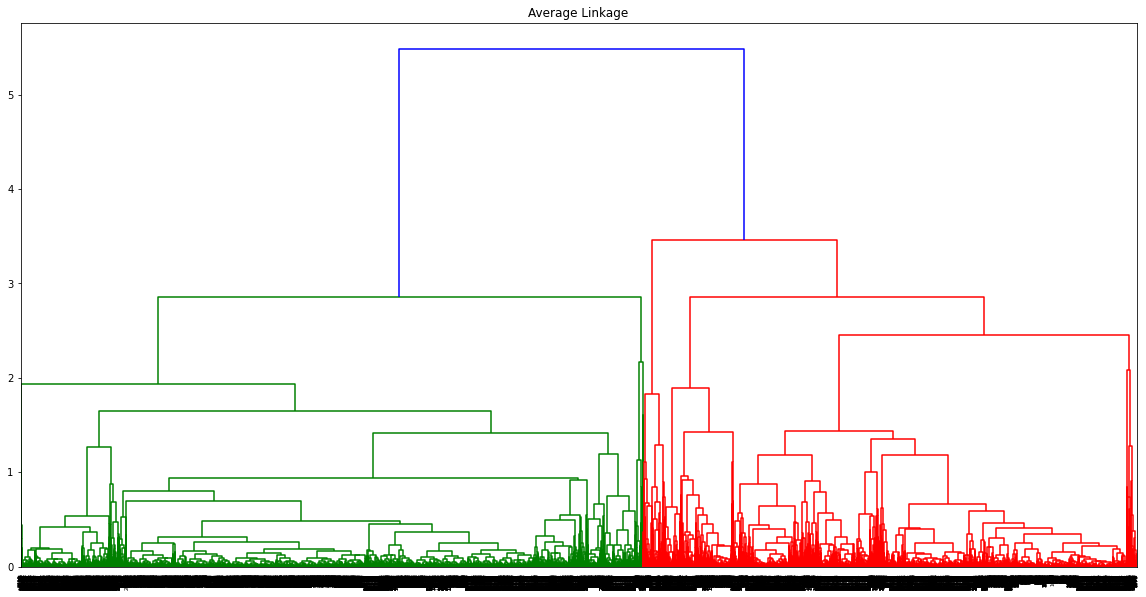

In [ ]:
avg = linkage(x, 'average')

plt.figure(figsize=(20, 10))
plt.title('Average Linkage')
dendrogram(
    avg,
    leaf_rotation=90.,        
)

plt.show()

Dendrogram terdiri atas sumbu x yang berisi sample yang kita miliki dan sumbu y yang merepresentasikan jarak antara sample tersebut. <br><br>Dari dendrogram, dapat dilihat bahwa jumlah cluster yang optimal yaitu 2. 

### Menghitung Internal Measures

13.	Setelah menentukan jumlah cluster, kemudian kita dapat melakukan perhitungan untuk menentukan centroids dari dua cluster, perhitungan WSS dan BSS, dan Silhouette Coefficient menggunakan fungsi yang sebelumnya telah dijelaskan di atas. 
Parameter yang digunakan yaitu 2 (sebagai jumlah cluster, didapat dari hasil dendogram di atas), dan ‘average’ sebagai jenis linkage. 


Centroids:
[[-121.62295562   37.84676055]
 [-117.94261659   33.87667651]]
<class 'numpy.ndarray'>
Within Cluster Sums of Squares:  26866.78932738695
Between Cluster Sum of Squares:  150142.19095350453
For n_clusters = 2 The average silhouette_score is : 0.7496267796978704


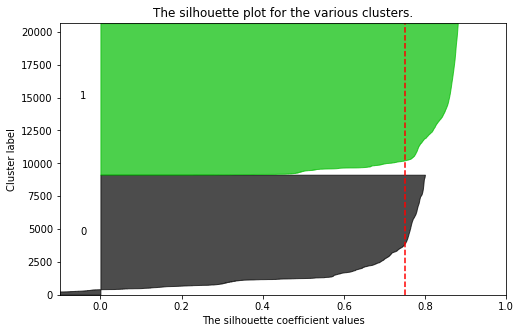

In [ ]:
hiearchical_clustering(2, 'average')   

Didapatkan data berupa: 
1.	Centroids yaitu: 
a.	Cluster 0 : [-121.62295562   37.84676055]
b.	Cluster 1: [-117.94261659   33.87667651]
2.	Perhitungan WSS: 26866.78932738695
3.	Perhitungan BSS: 150142.19095350453
4.	Silhouette Score: 0.7496267796978704
5.	Dari silhouette plot yang didapat, terlihat bahwa memang jumlah cluster = 2 adalah pilihan yang tepat, dikarenakan plotting antara cluster 0 dan 1 yang luasnya lumayan merata. 


### Visualisasi Agglomerative Clustering dengan Average Linkage

14.	Melakukan labeling sesuai dengan cluster yang sebelumnya telah dibuat. Sebelum itu, kita harus melakukan fitting dan prediksi pada dataset yang kita punya yaitu California House Pricing. 

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average')
y_agglom_avg = agglom.fit_predict(x)

In [ ]:
y_agglom_avg

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
uniqueValues = np.unique(y_agglom_avg)
print('Unique Values : ',uniqueValues)

Unique Values :  [0 1]


15.	Setelah menemukan label, kita dapat memasukkan label tersebut ke dataset yang sebelumnya kita miliki. 

In [ ]:
df['Cluster_AVG'] = y_agglom_avg
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Cluster_AVG
18522,-122.05,36.97,16.0,3363.0,611.0,1603.0,556.0,4.2542,294100.0,NEAR OCEAN,0
17683,-121.86,37.29,14.0,6160.0,1222.0,2472.0,1204.0,4.1444,178400.0,<1H OCEAN,0
4214,-118.27,34.13,47.0,1375.0,359.0,1512.0,418.0,2.1071,208900.0,<1H OCEAN,1
5974,-117.76,34.11,22.0,4935.0,954.0,2874.0,938.0,3.9825,180500.0,INLAND,1
8809,-118.41,33.75,4.0,311.0,51.0,128.0,46.0,9.8091,500001.0,NEAR OCEAN,1
4348,-118.36,34.11,35.0,3946.0,695.0,1361.0,620.0,6.5195,500001.0,<1H OCEAN,1
6266,-117.94,34.04,36.0,1431.0,354.0,1367.0,334.0,3.5592,160200.0,<1H OCEAN,1
15569,-116.93,33.06,16.0,3490.0,545.0,1628.0,535.0,4.8836,239900.0,<1H OCEAN,1
6898,-118.13,34.04,36.0,1938.0,364.0,1118.0,374.0,3.5833,227300.0,<1H OCEAN,1
2128,-119.72,36.80,16.0,2396.0,526.0,1338.0,518.0,2.1653,78800.0,INLAND,0


Di atas yaitu contoh sampling yang dilakukan pada data untuk melihat hasil dari clustering. 

16.	Untuk melakukan visualisasi, kita dapat menggunakan scatterplot dari library matplotlib. 

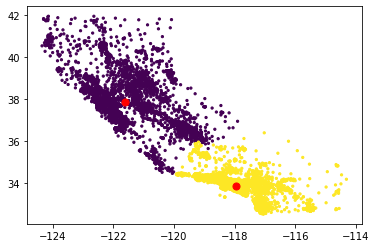

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y_agglom_avg, s=5, cmap='viridis')

clf = NearestCentroid()
clf.fit(x, y_agglom_avg)
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=1);

## Clustering Agglomerative dengan Complete Linkage

### Menentukan Jumlah Cluster menggunakan Dendrogram

17.	Sama seperti pada average linkage, kita menentukan jumlah cluster menggunakan Dendogram. Adapun method yang kita gunakan yaitu complete linkage. 

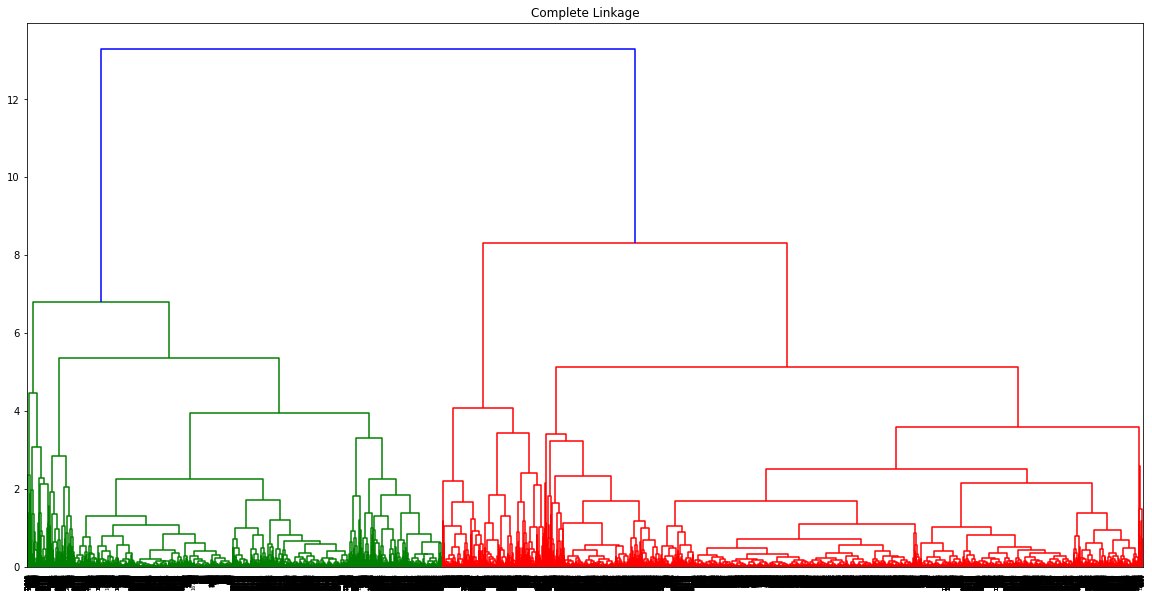

In [ ]:
# generate the linkage matrix
complete = linkage(x, 'complete')

plt.figure(figsize=(20, 10))
plt.title('Complete Linkage')
dendrogram(
    complete,
    leaf_rotation=90.,        
)

plt.show()

Dari dendrogram, dapat dilihat bahwa jumlah cluster yang optimal yaitu 2. 

### Menghitung Internal Measures

18.	Setelah menentukan jumlah cluster, kemudian kita dapat melakukan perhitungan untuk menentukan centroids dari dua cluster, perhitungan WSS dan BSS, dan Silhouette Coefficient menggunakan fungsi yang sebelumnya telah dijelaskan di atas dan seperti metode average linkage di atas. 
Parameter yang digunakan yaitu 2 (jumlah cluster optimal), dan ‘complete’ sebagai method linkage yang akan digunakan.  


Centroids:
[[-118.17806952   34.1429973 ]
 [-121.91079792   38.13651982]]
<class 'numpy.ndarray'>
Within Cluster Sums of Squares:  27776.750234218624
Between Cluster Sum of Squares:  149232.23004667283
For n_clusters = 2 The average silhouette_score is : 0.7243135511728369


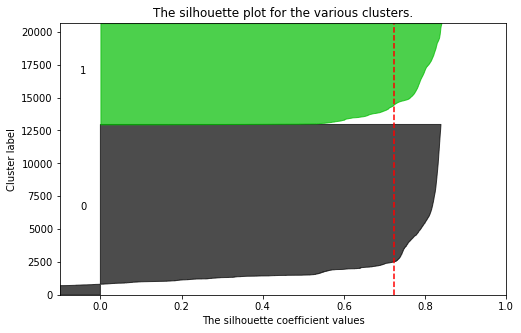

In [ ]:
hiearchical_clustering(2, 'complete')   

Didapatkan data berupa: 
1.	Centroids yaitu: 
a.	Cluster 0 : [-118.17806952   34.1429973 ]
b.	Cluster 1: [-121.91079792   38.13651982]
2.	Perhitungan WSS: 27776.750234218624
3.	Perhitungan BSS: 149232.23004667283
4.	Silhouette Score: 0.7243135511728369
5.	Dari silhouette plot yang didapat, terlihat bahwa memang jumlah cluster yang optimal adalah 2 dikarenakan plotting antara cluster 0 dan 1 yang luasnya lumayan merata. 


### Visualisasi Agglomerative Clustering dengan Complete Linkage

19.	Melakukan labeling sesuai dengan cluster yang sebelumnya telah dibuat. Sebelum itu, kita harus melakukan fitting dan prediksi pada dataset yang kita punya yaitu California House Pricing. 

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
y_agglom_complete = agglom.fit_predict(x)

In [ ]:
y_agglom_complete

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
uniqueValues = np.unique(y_agglom_complete)
print('Unique Values : ',uniqueValues)

Unique Values :  [0 1]


20.	Setelah menemukan label, kita dapat memasukkan label tersebut ke dataset yang sebelumnya kita miliki. 

In [ ]:
df['Cluster_Complete'] = y_agglom_complete
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Cluster_AVG,Cluster_Complete
2712,-115.64,32.75,19.0,377.0,69.0,198.0,55.0,1.6250,112500.0,INLAND,1,0
4817,-118.29,34.04,48.0,1353.0,488.0,1945.0,487.0,2.4359,123700.0,<1H OCEAN,1,0
18803,-122.06,40.55,17.0,3057.0,577.0,1497.0,556.0,3.5189,101000.0,INLAND,0,1
13762,-117.09,34.07,24.0,6260.0,1271.0,3132.0,1189.0,2.5156,103000.0,INLAND,1,0
12623,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,212200.0,INLAND,0,1
7016,-118.08,33.97,36.0,1678.0,323.0,1380.0,352.0,3.5481,163300.0,<1H OCEAN,1,0
4008,-118.62,34.15,26.0,5661.0,791.0,2493.0,780.0,7.9814,409900.0,<1H OCEAN,1,0
1445,-121.99,37.97,28.0,2839.0,428.0,1372.0,443.0,6.2135,217200.0,INLAND,0,1
5175,-118.27,33.95,34.0,1261.0,315.0,1027.0,303.0,2.2946,88800.0,<1H OCEAN,1,0
1688,-122.27,37.98,23.0,3455.0,479.0,1375.0,474.0,6.0289,218600.0,NEAR BAY,0,1


21.	Untuk melakukan visualisasi, kita dapat menggunakan scatterplot dari library matplotlib. 

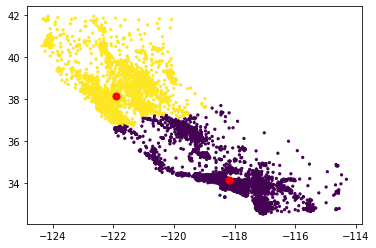

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y_agglom_complete, s=5, cmap='viridis')

clf = NearestCentroid()
clf.fit(x, y_agglom_complete)
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=1);

## Clustering Agglomerative dengan Ward Linkage

### Menentukan Jumlah Cluster menggunakan Dendrogram

22.	Method yang digunakan untuk membuat dendrogram yaitu ward linkage. 

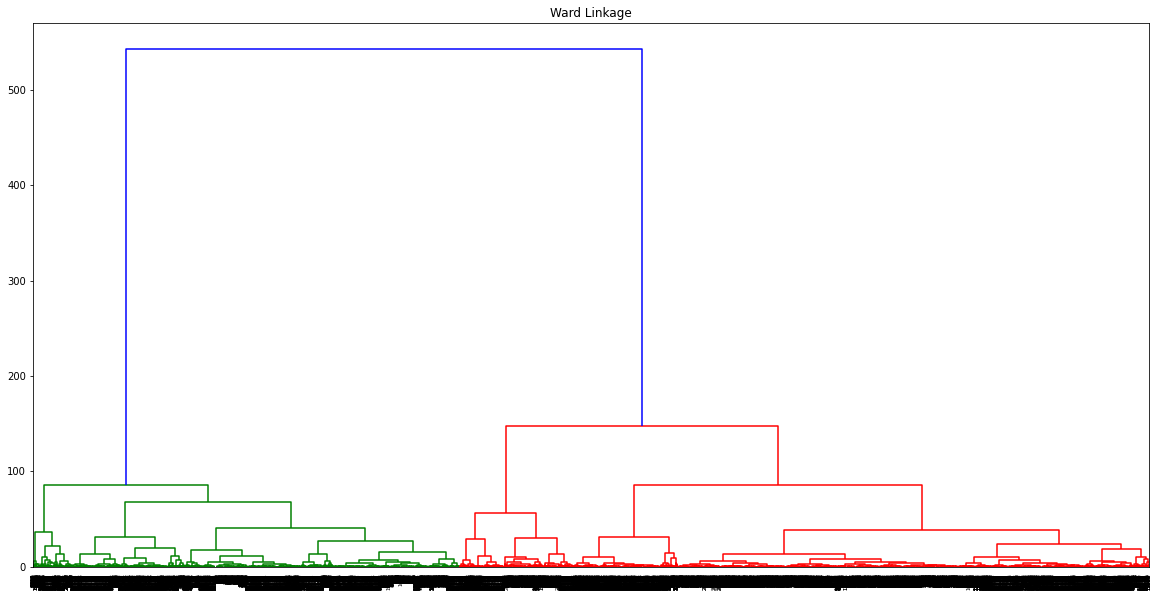

In [ ]:
# generate the linkage matrix
ward = linkage(x, 'ward')

plt.figure(figsize=(20, 10))
plt.title('Ward Linkage')
dendrogram(
    ward,
    leaf_rotation=90.,         
)

plt.show()

### Menghitung Internal Measures

23.	Setelah menentukan jumlah cluster, kemudian kita dapat melakukan perhitungan untuk menentukan centroids dari dua cluster, perhitungan WSS dan BSS, dan Silhouette Coefficient menggunakan fungsi yang sebelumnya telah dijelaskan di atas dan seperti metode agglomerative lainnya di atas. 
Parameter yang digunakan yaitu 2 (jumlah cluster optimal), dan ‘ward’ sebagai method linkage yang akan digunakan.  


Centroids:
[[-118.12417712   34.10910502]
 [-121.91043147   38.09764467]]
<class 'numpy.ndarray'>
Within Cluster Sums of Squares:  27430.97509774672
Between Cluster Sum of Squares:  149578.00518314476
For n_clusters = 2 The average silhouette_score is : 0.7398926707558655


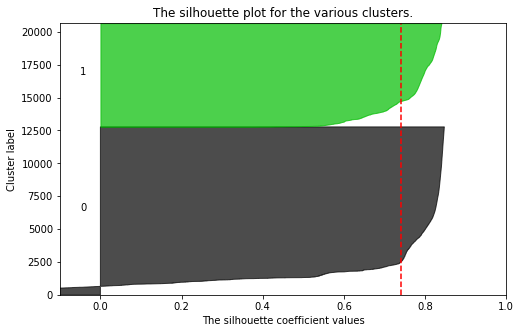

In [ ]:
hiearchical_clustering(2, 'ward')   

Didapatkan data berupa: 
1.	Centroids yaitu: 
a.	Cluster 0 : [-118.12417712   34.10910502]
b.	Cluster 1: [-121.91043147   38.09764467]
2.	Perhitungan WSS: 27430.97509774672
3.	Perhitungan BSS: 149578.00518314476
4.	Silhouette Score: 0.7398926707558655
5.	Dari silhouette plot yang didapat, terlihat bahwa memang jumlah cluster yang optimal adalah 2 dikarenakan plotting antara cluster 0 dan 1 yang luasnya lumayan merata. 


### Visualisasi Agglomerative Clustering dengan Complete Linkage

24.	Melakukan labeling sesuai dengan cluster yang sebelumnya telah dibuat. Sebelum itu, kita harus melakukan fitting dan prediksi pada dataset yang kita punya yaitu California House Pricing. 

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_agglom_ward = agglom.fit_predict(x)

In [ ]:
y_agglom_ward

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
uniqueValues = np.unique(y_agglom_ward)
print('Unique Values : ',uniqueValues)

Unique Values :  [0 1]


25.	Setelah menemukan label, kita dapat memasukkan label tersebut ke dataset yang sebelumnya kita miliki. 

In [ ]:
df['Cluster_Ward'] = y_agglom_ward
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Cluster_AVG,Cluster_Complete,Cluster_Ward
5114,-118.30,33.96,43.0,2009.0,442.0,1095.0,439.0,2.8299,109500.0,<1H OCEAN,1,0,0
666,-122.14,37.69,38.0,1571.0,317.0,874.0,301.0,4.4659,189100.0,NEAR BAY,0,1,1
6885,-118.09,34.06,31.0,1146.0,289.0,1163.0,258.0,2.2083,185600.0,<1H OCEAN,1,0,0
20325,-119.04,34.28,21.0,1856.0,276.0,863.0,255.0,4.5833,500001.0,<1H OCEAN,1,0,0
14124,-117.08,32.75,20.0,1886.0,586.0,1134.0,525.0,1.5029,100000.0,NEAR OCEAN,1,0,0
7753,-118.11,33.91,19.0,3056.0,759.0,1561.0,740.0,3.1369,196900.0,<1H OCEAN,1,0,0
16814,-122.43,37.64,34.0,8400.0,1812.0,4101.0,1717.0,4.1033,301000.0,NEAR OCEAN,0,1,1
5986,-117.71,34.10,52.0,567.0,152.0,2688.0,126.0,1.8750,212500.0,INLAND,1,0,0
2615,-124.11,40.95,19.0,1734.0,365.0,866.0,342.0,2.9600,81700.0,NEAR OCEAN,0,1,1
3224,-119.68,36.31,12.0,2739.0,535.0,1859.0,498.0,2.9936,60600.0,INLAND,0,0,0


26.	Untuk melakukan visualisasi, kita dapat menggunakan scatterplot dari library matplotlib. 

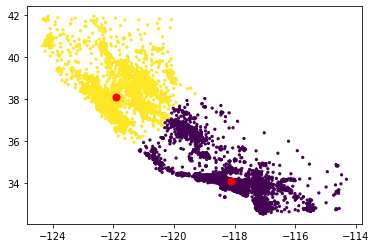

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y_agglom_ward, s=5, cmap='viridis')

clf = NearestCentroid()
clf.fit(x, y_agglom_ward)
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=1);

# Tahap 3: Evaluasi
### Perbandingan Hasil Average Linkage, Complete Linkage, dan Ward Linkage
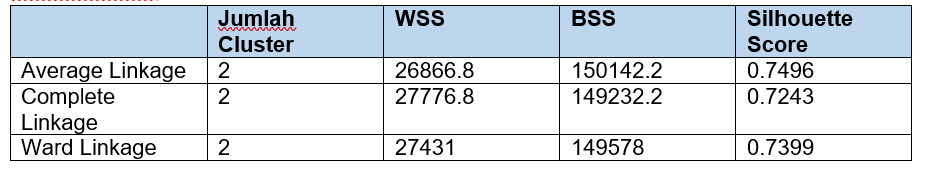

<br>
<br>


Hasil clustering yang bagus adalah hasil clustering dengan nilai WSS lebih kecil dan nilai BSS yang lebih besar, dan silhouette score yang paling mendekati 1. 

Dari perbandingan yang kita dapatkan, dilihat bahwa: 
1.	Nilai WSS terkecil dimiliki oleh average linkage dan terbesar dimiliki oleh complete linkage. 
2.	Nilai BSS terbesar dimiliki oleh average linkage dan terkecil dimiliki oleh complete linkage. 
3.	Nilai silhouette score terbesar dimiliki oleh average linkage. 
Dari hasil yang kita dapatkan juga dapat disimpulkan bahwa: 
1.	Kinerja dari method Agglomerative Clustering dengan Average Linkage yang paling bagus dan efektif.  
2.	Urutan kinerja dari paling bagus menuju paling buruk: 
Average Linkage > Ward Linkage > Complete Linkage


# Referensi
Referensi yang digunakan dalam membuat tugas yaitu:<br> 
1. https://stats.stackexchange.com/questions/81954/ssb-sum-of-squares-between-clusters
2. http://bagusco.staff.ipb.ac.id/files/2016/06/Analisis-Cluster-Bagian-2.pdf
3. https://www.kdnuggets.com/2019/05/golden-goose-cohort-analysis.html/2
4. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
5. https://towardsdatascience.com/agglomerative-clustering-and-dendrograms-explained-29fc12b85f23
6. https://www.kaggle.com/esanvsh/iris-clustering-with-k-means-hierarchical


